MNIST Dataset Support Vector Machine (SVM) by Micah Borghese

The SVM model is a supervised learning model that can be used for both classification and regression problems. The SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear hyperplane that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the hyperplane they fall on.

Thoughout this notebook, I'm going to guide in the creation of a support vecotor regressor (SVM with application in regression analysis) learning model to recognize handwritten digits on a 28x28 pixel canvas

In [5]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import LeaveOneOut, cross_val_score

ds, info = tfds.load('mnist', split=None, with_info=True)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Now, after importing the dataset, I'm going to convert and scale the data into a readable format I can mess with. Scaling the data will also ensure a statistically consistant feature set my model can use to easily classify.

In [6]:
training_image_arrays = np.array(list(ds['train'].map(lambda x: x['image']).as_numpy_iterator())) # Convert images to NumPy arrays

X_train = training_image_arrays.reshape(training_image_arrays.shape[0], -1) # Flatten images (28x28) to 1D vectors of 784 pixels
print("X_train shape:", X_train.shape)

scaler_X = StandardScaler().fit(X_train) # standardize the features based on X_train
X_train = scaler_X.transform(X_train) # replaced the original train with the rescaled version

y_train = np.array(list(ds['train'].map(lambda x: x['label']).as_numpy_iterator())) # create a numpy array of (60000,) for the labels
print("y_train shape:", y_train.shape)

X_train shape: (60000, 784)
y_train shape: (60000,)


Now, let's check the work by displaying a sample image from the dataset and perform the same operations to gather and format the test set data.

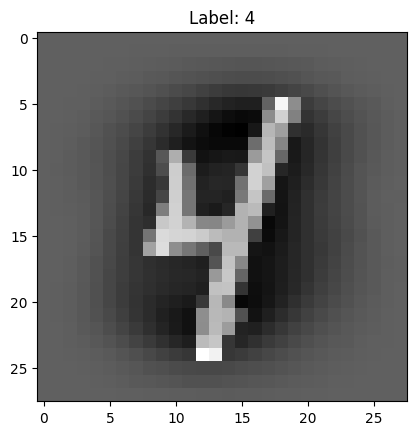

In [7]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray') # display X[0] in a 28 x 28 grid
plt.title(f"Label: {y_train[0]}")
plt.show()

In [7]:
testing_image_arrays = np.array(list(ds['test'].map(lambda x: x['image']).as_numpy_iterator())) # Convert images to NumPy arrays

X_test = testing_image_arrays.reshape(testing_image_arrays.shape[0], -1) # Flatten images (28x28) to 1D vectors of 784 pixels
X_test = scaler_X.transform(X_test) # replaced the original test with the rescaled version

y_test = np.array(list(ds['test'].map(lambda x: x['label']).as_numpy_iterator())) # create a numpy array of (10000,) for the labels

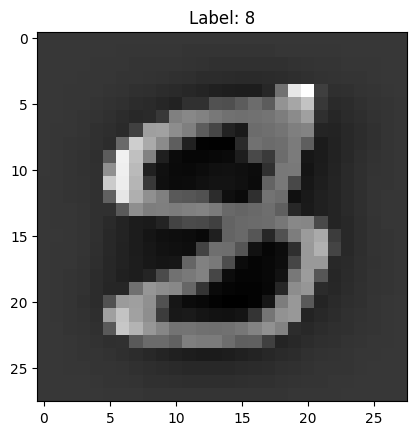

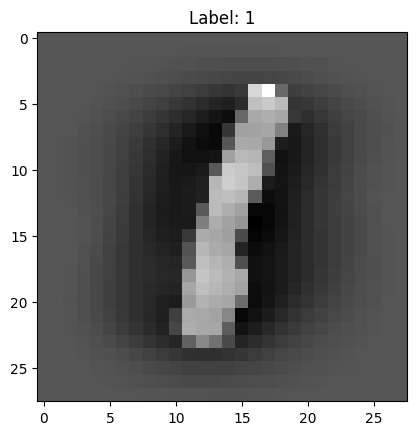

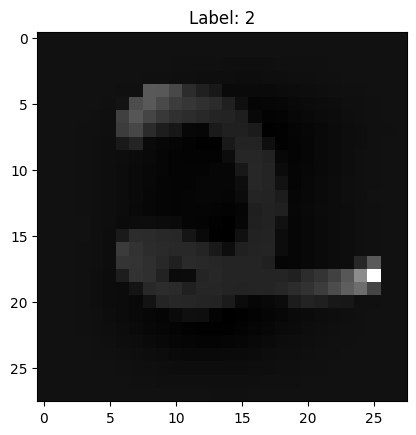

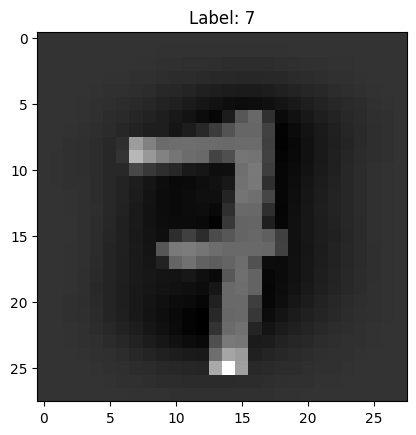

In [9]:
for i in range(4,8):
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray') # display X[0] in a 28 x 28 grid
    plt.title(f"Label: {y_train[i]}")
    plt.show()

Using Scikit-Learn's Support Vector Machine (SVM) classification method, I can train a model to classify the images in the MNIST dataset. 

First I'm going to try with the radial basis functions (rbf) kernel, which is a good choice for handling non-linearly seperable feature vectors. It is important to note that the default value of the gamma parameter of rbf is 1/(n_features * X.var()) and the default value of the C parameter is 1.0. Since this will be a non-binary classification (there are 10 classes), I have also set the decision strategy to one-vs-the-rest.

In [10]:
svm = LinearSVC(C=1e3, multi_class='ovr') # create a SVM model
print(X_train.shape, y_train.shape)
svm = svm.fit(X_train, y_train) # train the model on the training data

(60000, 784) (60000,)


c:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


After building the SVM, I'm going to save the object in a file using Pickle

In [11]:
import pickle
pickle.dump(svm, open('svm_model.pkl', 'wb'))
pickle.dump(scaler_X, open('standardize_model.pkl', 'wb'))

Now, I'm going to run the prediction against the test cases from when I partitioned the dataset

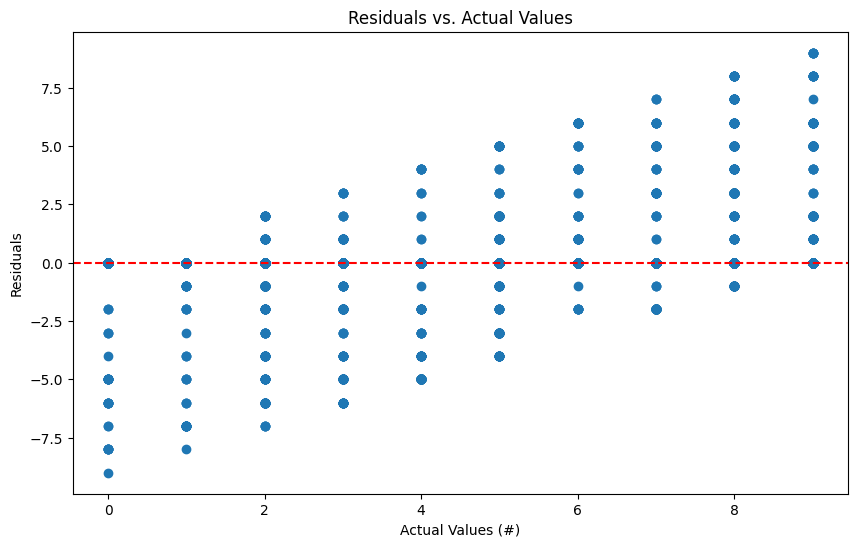

In [13]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values (#)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

The provided confusion matrix offers a detailed snapshot of a classification model's performance across ten classes (digits 0-9). Notably, the diagonal elements indicate the number of correct predictions for each class. The model achieved high precision in predicting class "1" (with 1126 correct predictions) and class "2" (with 1006 correct predictions). However, off-diagonal elements are areas of misclassification, such as instances where class 1 was mistakenly predicted as class 2 three times. Nonetheless, he matrix illustrates the model's exceptional performance.

Below the confusion matrix is the accuracy score. My model was able to classify grayscale digits in the MNIST dataset at 97.92% accuracy!

Below I'm generating a proof of 5 predictions that my model made with the corrosponding images. Since my model has a high accuracy rate, we should see that most of the predictions and images match to the human eye!

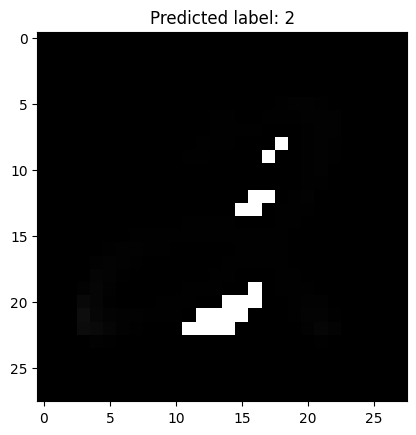

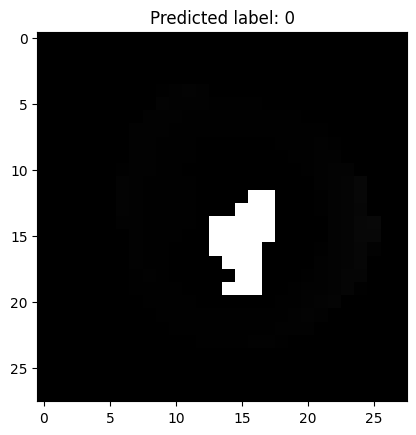

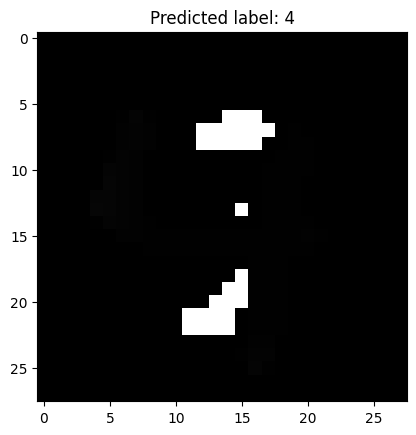

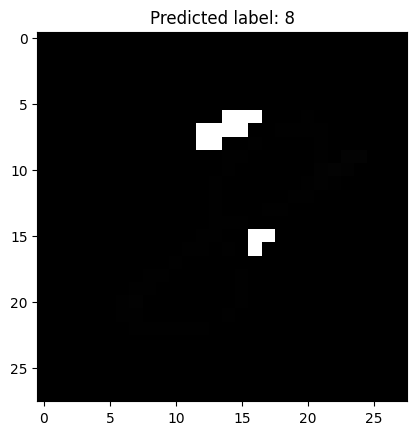

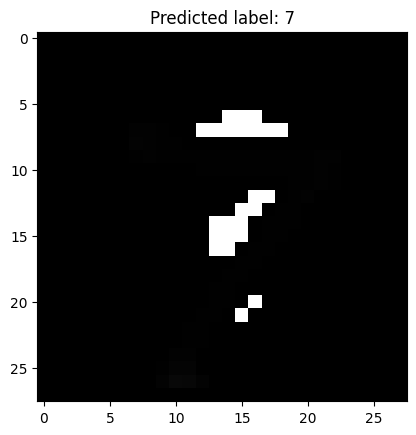

0.8837


In [8]:
import pickle
svm_model = pickle.load(open('svm_model.pkl', 'rb'))

y_pred = svm_model.predict(X_test)

for i in range(5):
    pixel_data = []
    for j in range(784): # 784 pixels in each image
        pixel_data.append(X_test[i][j])
    pixel_array = np.array(pixel_data, dtype='uint8')
    image_matrix = pixel_array.reshape((28, 28))

    plt.imshow(image_matrix, cmap='gray')  # 'gray' colormap for black and white images
    plt.title(f"Predicted label: {y_pred[i]}")
    plt.show()

print(svm_model.score(X_test, y_test))

In [15]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
svm = SVC(kernel='rbf', C=1.15, gamma=0.2, decision_function_shape='ovr', random_state=0)
svm = svm.fit(X_train, y_train) # train the model on the training data and use OneVsRestClassifier to handle multiclass classification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Great! Now, I'm going to do some Normalizing on the original data to see if that affects the accuracy rates...

In [ ]:
# change all non-zero values of X_train to 1
X_train[X_train > 0] = 1
# change all non-zero values of X_test to 1
X_test[X_test > 0] = 1

from sklearn.svm import SVC
svm = SVC(kernel='rbf', decision_function_shape='ovr', random_state=0)
svm = svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("Accuracy score:", accuracy_score(y_test, y_pred))


C:\Users\micah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 972    1    0    0    0    0    2    1    3    1]
 [   0 1122    2    1    1    1    2    0    6    0]
 [   4    0 1010    3    1    0    0    7    7    0]
 [   0    0    3  986    0    2    0    5   11    3]
 [   2    0    2    0  956    0    3    1    2   16]
 [   2    0    0   11    0  863    4    1    9    2]
 [   7    2    0    0    2    4  940    0    3    0]
 [   2    5    9    2    2    0    0  998    1    9]
 [   5    1    4    8    5    3    1    4  941    2]
 [   1    6    1   10    8    3    1    5    6  968]]
Precision: 0.9756090351328016
Recall: 0.9753827777035863
Accuracy score: 0.9756


It doesn't look like the model did much better as a result.